In [86]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0


In [87]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [88]:
# Lets visualise the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Set up the target dir
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  # print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image shape: {img.shape}")
  return img


Image shape: (512, 512, 3)


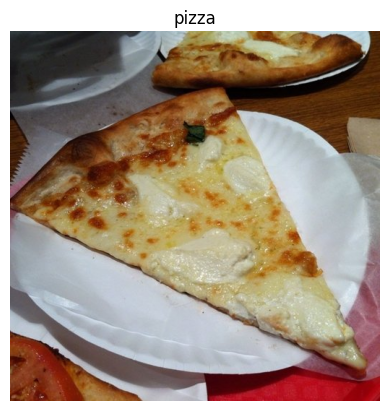

In [89]:
img = view_random_image('10_food_classes_10_percent/train/', 'pizza')

In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '10_food_classes_10_percent/train/'
test_dir = '10_food_classes_10_percent/test/'
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [91]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size=32,
                                               class_mode = 'categorical')


test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (224, 224),
                                               batch_size=32,
                                               class_mode = 'categorical')

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [92]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [94]:
base_model.trainable = False

Emodel = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(10, activation='softmax'),
])

In [95]:
Emodel.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [97]:
Emodel_history = Emodel.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = test_data.samples // test_data.batch_size,
    callbacks = [create_tensorboard_callback(dir_name='tensorflow_hub', experiment_name='efficientnetb0')]
)

Saving TensorBoard log files to: tensorflow_hub/efficientnetb0/20241118-132627
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0711 - loss: 2.3137

C:\Users\anura\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 298s 13s/step - accuracy: 0.0714 - loss: 2.3136 - val_accuracy: 0.1002 - val_loss: 2.3032
Epoch 2/5


c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 2.3151
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 220s 9s/step - accuracy: 0.1107 - loss: 2.3068 - val_accuracy: 0.1002 - val_loss: 2.3029
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 2.3100
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 158s 7s/step - accuracy: 0.1066 - loss: 2.3072 - val_accuracy: 0.0998 - val_loss: 2.3039


<Axes: >

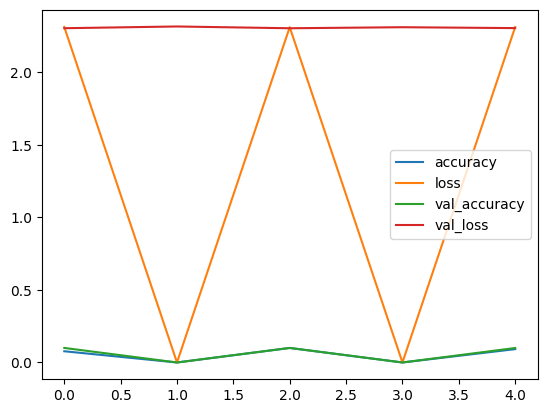

In [99]:
import pandas as pd
pd.DataFrame(Emodel_history.history).plot()

In [100]:
Emodel.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.1084 - loss: 2.3023


[2.3038687705993652, 0.10000000149011612]